### Important notice : this notebook works under @rom1lebogoss conda env and not under @autoqchem conda env...

# Import 

In [17]:
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import descriptors.numbering_CO as nb

# Load data : the fragment.csv corrected from step 1

In [18]:
unik_CO_df = pd.read_csv('fragmentation_files/fragments_corrected.csv', sep =',')

In [19]:
print(len(unik_CO_df))

368


In [20]:
unik_CO_df.loc[276]

react            COc1ccc(CCCO)cc1
fragC             *c1ccc(CCCO)cc1
fragO                         *OC
product    OCCCc2ccc(c1ccccc1)cc2
Name: 276, dtype: object

# Map the Carbon and Oxygen involved in the coupling

In [22]:
# numerotation des carbones aromatiques 0 et de l'oxygène 1
List_numbered_OC = []
n = 0
for j in range(len(unik_CO_df)):
    mol, CO_frag, ar_frag = Chem.MolFromSmiles(unik_CO_df["react"][j]), unik_CO_df["fragO"][j], unik_CO_df["fragC"][j]
    mol, wn = nb.number_C0O1(mol, CO_frag, ar_frag)
    List_numbered_OC.append([j, Chem.MolToSmiles(mol)])

# Visualise the different numbering in order to correct potentials errors

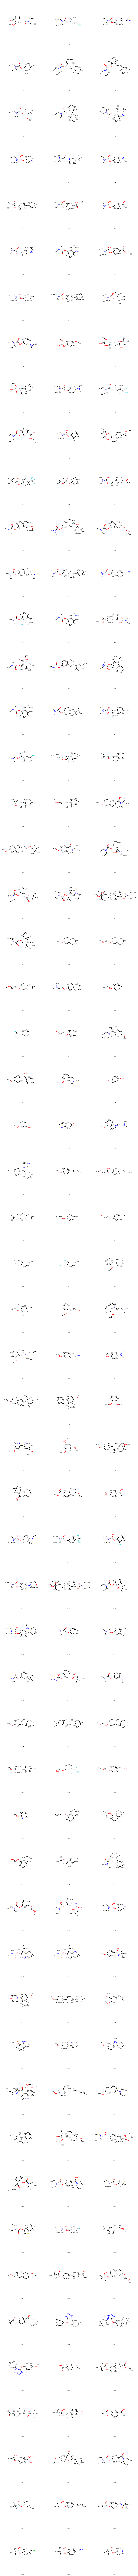

In [24]:
# better do it by slices of 200 molecules !
verif_mols = []
L=[str(i) for i in range(len(List_numbered_OC))]
for i in range(len(List_numbered_OC)):
    verif_mols.append(Chem.MolFromSmiles(List_numbered_OC[i][1]))
    
Draw.MolsToGridImage(verif_mols[200:], subImgSize=(400, 400), maxMols = 200, legends = L[200:])

###### an eventual manual correction can be done and the array with the molecules numbered can be updated
###### In this example molecules : 25, 104, 157, 329, 340, 344, 345 have to be renumbered correctly

# Manual correction

In [25]:
Correction = []

In [26]:
# make a loop over the index to correct manually.

In [27]:
index = 340
react_prod = str(unik_CO_df.loc[index]["product"] + "." + List_numbered_OC[index][1])
print(List_numbered_OC[index][1])
#Draw.MolToImage(Chem.MolFromSmiles(react_prod))

c1([O:1][C:5]([N:2]([CH2:3][CH3:4])[CH2:24][CH3:25])=[O:6])[cH:9][cH:10][c:11]2[cH:12][c:13]([C:14](=[O:15])[O:16][CH:17]([CH3:18])[CH3:19])[cH:20][cH:21][c:22]2[cH:23]1


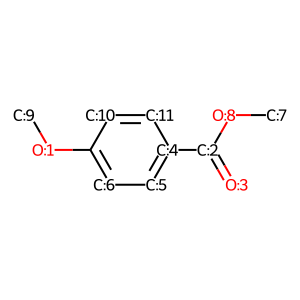

In [35]:
# write the a new smile with the good indexes for C0 and O1
new_smi = '[CH3:7][O:8][C:2](=[O:3])[c:4]1[cH:5][cH:6]c([O:1][CH3:9])[cH:10][cH:11]1'
mol = Chem.MolFromSmiles(new_smi)
Draw.MolToImage(mol)

In [36]:
Correction.append([index, new_smi])
Correction

[[340,
  '[CH3:7][O:8][C:2](=[O:3])[c:4]1[cH:5][cH:6]c([O:1][CH3:9])[cH:10][cH:11]1'],
 [340,
  '[CH3:7][O:8][C:2](=[O:3])[c:4]1[cH:5][cH:6]c([O:1][CH3:9])[cH:10][cH:11]1']]

In [38]:
# if needed the publication can be check with the function below
# df = pd.read_csv('../data/Data_test11262021.csv', sep=',')
# atom labeling has to be removed from mol.
# nb.show_DOIS(mol, 'Reactant Smile (C-O)', df)

# After doing all the manual corrections : update the numbered molecules list

In [39]:
id_to_change = [Correction[i][0] for i in range(len(Correction))]
for i in range(len(List_numbered_OC)):
    if List_numbered_OC[i][0] in id_to_change:
        List_numbered_OC[i][1] = Correction[id_to_change.index(i)][1]

In [40]:
#update the dataframe:
number_smi = [List_numbered_OC[i][1] for i in range(len(List_numbered_OC))]
unik_CO_df["C0O1_num"] = number_smi

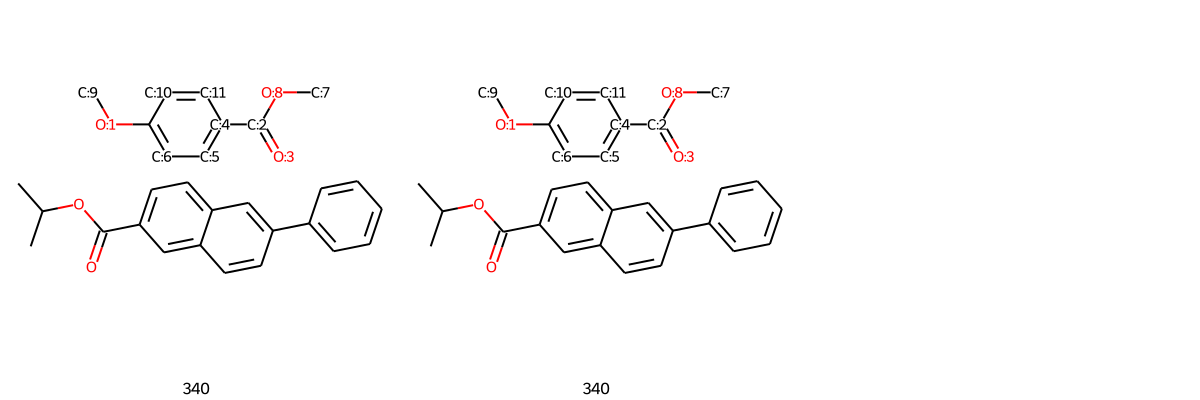

In [41]:
# verification of the wrong indexes
mols_updated = []
for i in id_to_change:
    index = i
    react_prod = str(unik_CO_df.loc[index]["product"] + "." + List_numbered_OC[index][1])
    mols_updated.append(Chem.MolFromSmiles(react_prod))
    
L = [str(i) for i in id_to_change]
Draw.MolsToGridImage(mols_updated, subImgSize=(400, 400), maxMols = 200, legends = L)

In [46]:
# export data to new .csv
unik_CO_df.to_csv("fragmentation_files/fragments_C0O1.csv", sep=',',index=False)

# Number the aromatic atoms C2 to C6

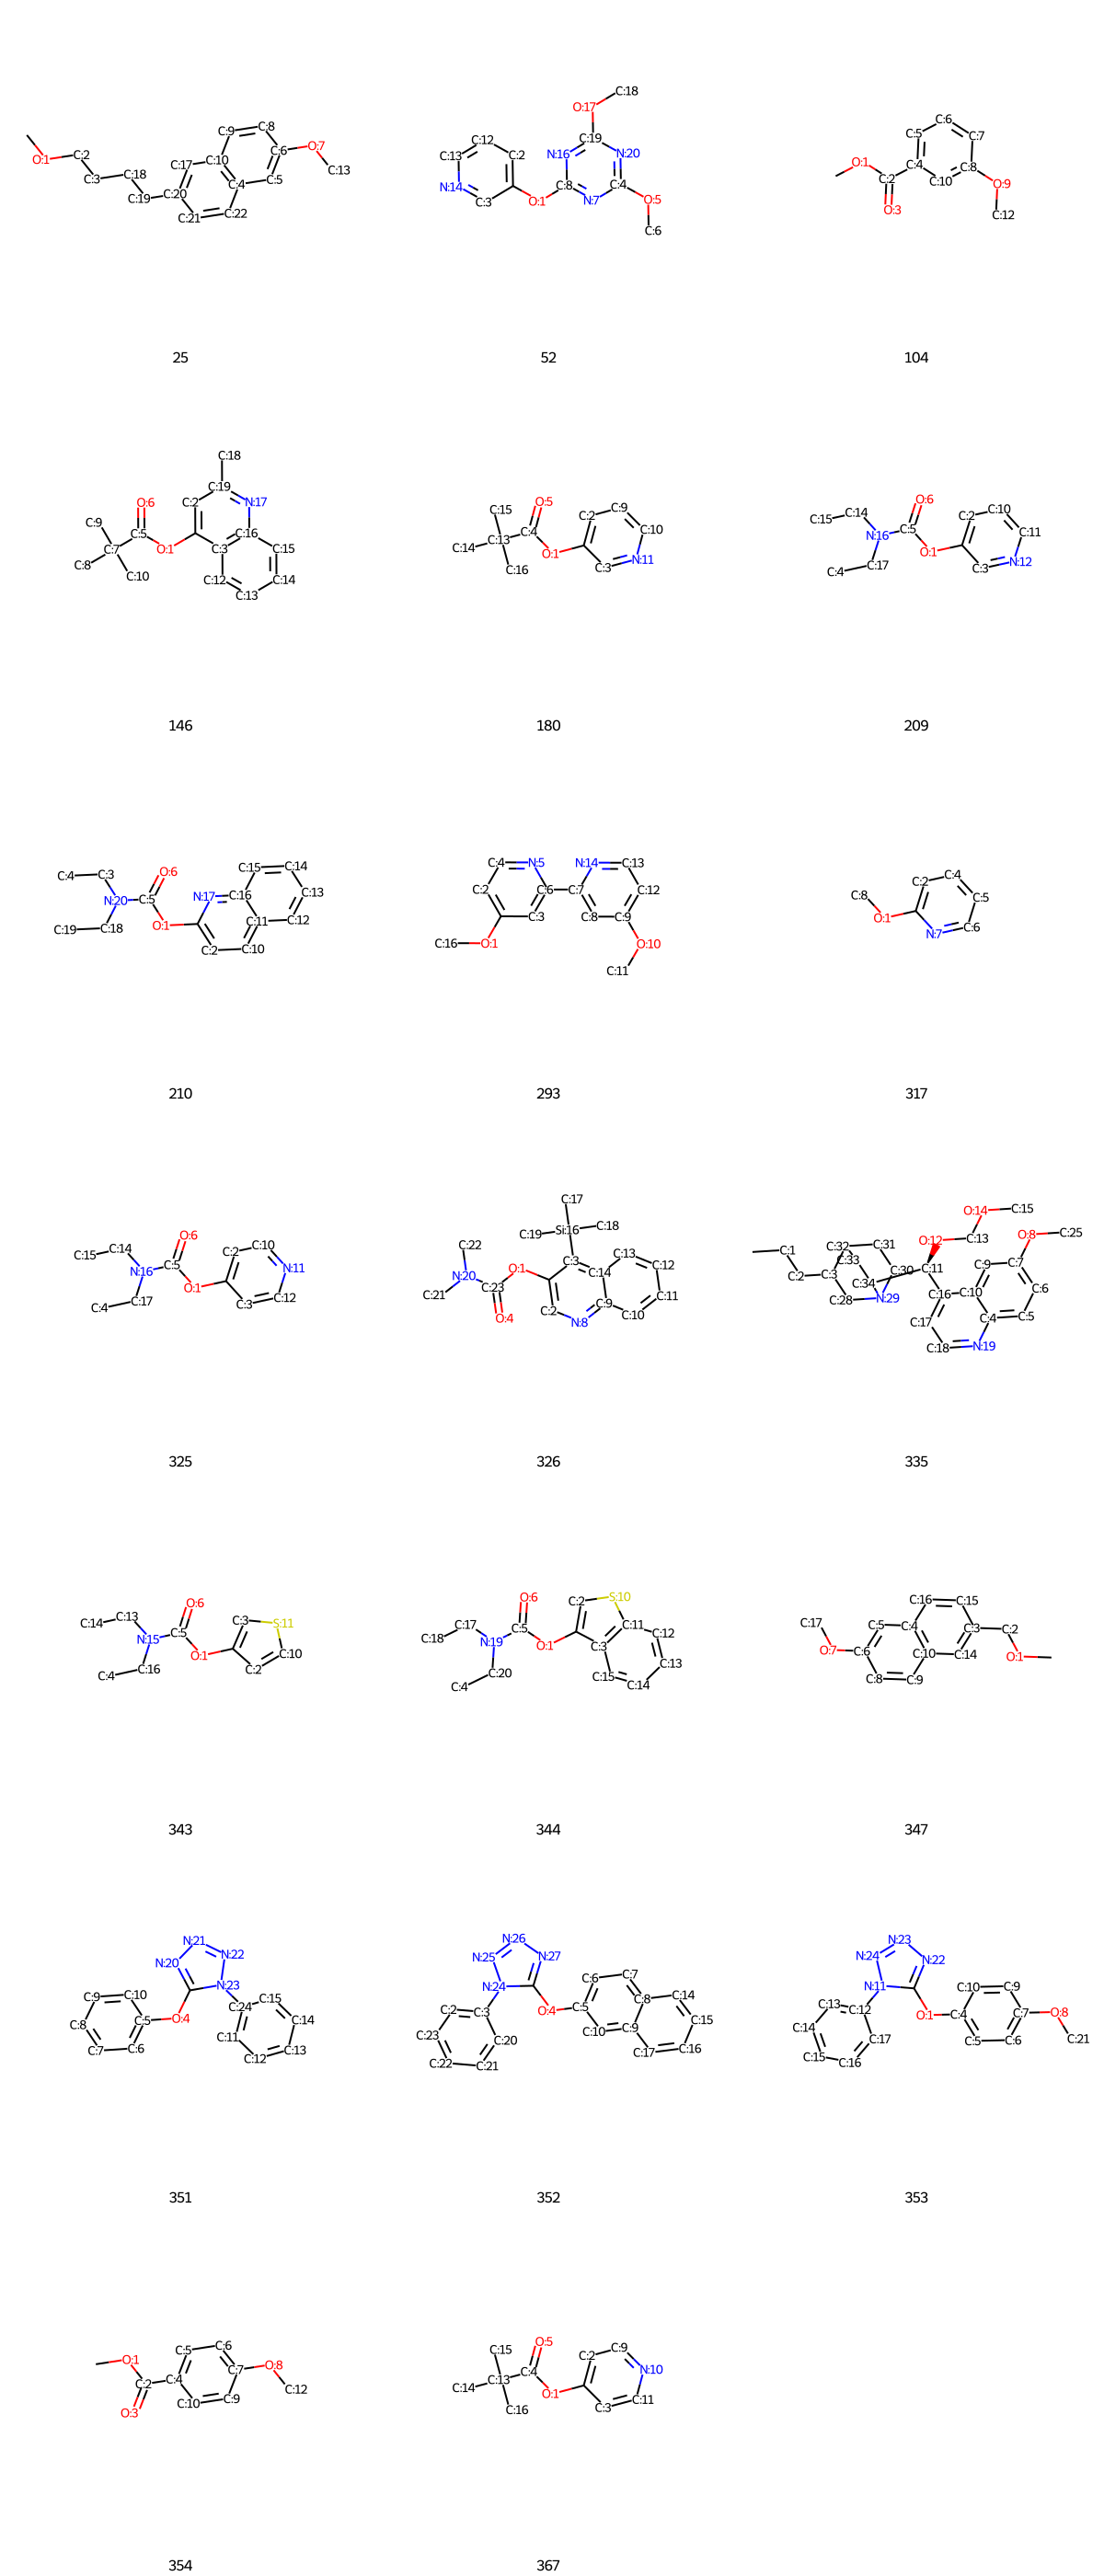

In [47]:
unik_CO_df2 = pd.read_csv("fragmentation_files/fragments_C0O1.csv", sep=',')
# numerotation of the aromatic atoms
List_numbered_arom = []
for j in range(len(unik_CO_df2)):
    mol = Chem.MolFromSmiles(unik_CO_df2["C0O1_num"][j])
    mol = nb.number_C2C3(mol)
    mol = nb.number_C456(mol)
    mol = nb.number_C2C3(mol)
    List_numbered_arom.append([j, Chem.MolToSmiles(mol)])
    
unik_CO_df2["C0C6_num"] = [List_numbered_arom[i][1] for i in range(len(List_numbered_arom))]

smi_to_renum = []
for i, smi_n in enumerate(unik_CO_df2["C0C6_num"]):
    mol = Chem.MolFromSmiles(smi_n)
    if nb.numbering_arom_fine(mol) == False:
        smi_to_renum.append([i, smi_n])

mols = []
L = []
for i in smi_to_renum:
    mols.append(Chem.MolFromSmiles(i[1]))
    L.append(str(i[0]))
Draw.MolsToGridImage(mols, subImgSize=(400, 400), maxMols = 200, legends = L)

###### an eventual manual correction can be done and the array with the molecules numbered can be updated
###### In this example molecules : 52, 146, 180, 281, 292, 358 have to be renumbered correctly

c1([O:1][C:9](=[O:10])[C:13]([CH3:14])([CH3:15])[CH3:16])[cH:2][cH:4][n:5][cH:6][cH:3]1


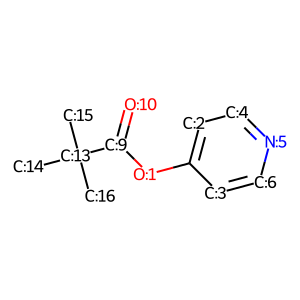

In [43]:
# vary smi_num from 0 to len(smi_to_renum)
smi_num = 0
#print(smi_to_renum[smi_num][1])
#Draw.MolToImage(Chem.MolFromSmiles(smi_to_renum[smi_num][1]))

In [44]:
new_smi = 'c1([O:1][C:9](=[O:10])[C:13]([CH3:14])([CH3:15])[CH3:16])[cH:2][cH:4][n:5][cH:6][cH:3]1'

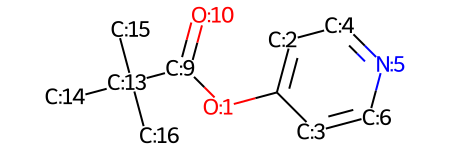

In [45]:
Chem.MolFromSmiles(new_smi)

In [46]:
# if the numerotation above is good update smi_to_renum
smi_to_renum[smi_num][1] = new_smi

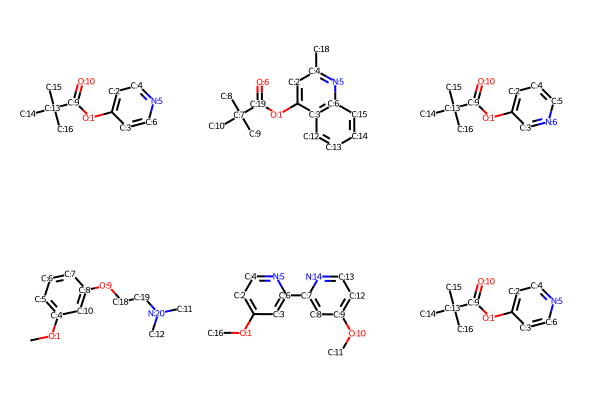

In [47]:
# final check
#Draw.MolsToGridImage([Chem.MolFromSmiles(smi_to_renum[i][1]) for i in range(len(smi_to_renum))])

# Once the correction has been done for all wrong molecules you can update the df

In [52]:
id_to_change = [smi_to_renum[i][0] for i in range(len(smi_to_renum))]
for i in range(len(List_numbered_arom)):
    if List_numbered_arom[i][0] in id_to_change:
        List_numbered_arom[i][1] = smi_to_renum[id_to_change.index(i)][1]
        
unik_CO_df2["C0C6_num"] = [List_numbered_arom[i][1] for i in range(len(List_numbered_arom))]

In [53]:
# export data to new .csv
# unik_CO_df2.to_csv("fragmentation_files/fragments_C0C6.csv", sep=',',index=False)

# Number the 8th and last atom bounded to the Oxygen

In [2]:
unik_CO_df3 = pd.read_csv("fragmentation_files/fragments_C0C6.csv", sep=',')

In [3]:
List_numbered_7 = []
for j in range(len(unik_CO_df3)):
    mol = Chem.MolFromSmiles(unik_CO_df3["C0C6_num"][j])
    mol = nb.number_7(mol)
    nb.rescale_atom_map(mol)
    List_numbered_7.append([j, Chem.MolToSmiles(mol)])

In [4]:
#Draw.MolsToGridImage([Chem.MolFromSmiles(List_numbered_7[i][1]) for i in range(len(List_numbered_7))], maxMols=200, subImgSize=(400, 400))

In [5]:
mol_to_reindex = []
for j in range(len(List_numbered_7)):
    if nb.numbering_8_fine(Chem.MolFromSmiles(List_numbered_7[j][1])) == False:
        mol_to_reindex.append([j, List_numbered_7[j][1]])

In [6]:
mol_to_reindex

[[52,
  'c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][n:5][cH:6][cH:3]1'],
 [146,
  'c1([O:1][C:7](=[O:6])[C:11]([CH3:8])([CH3:9])[CH3:10])[cH:2][c:4]([CH3:18])[n:5][c:6]2[c:3]1[cH:12][cH:13][cH:14][cH:15]2'],
 [180,
  'c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][cH:5][n:6][cH:3]1'],
 [281,
  'C[O:1][c:7]1[cH:5][cH:6][cH:2][c:8]([O:9][CH2:13][CH2:4][N:3]([CH3:11])[CH3:12])[cH:10]1'],
 [292,
  'c1([O:1][CH3:7])[cH:2][cH:4][n:5][c:6](-[c:15]2[cH:8][c:9]([O:10][CH3:11])[cH:12][cH:13][n:14]2)[cH:3]1'],
 [358,
  'c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][n:5][cH:6][cH:3]1']]

# Manual correction ...

c1([O:1][C:7](=[O:10])[C:13]([CH3:8])([CH3:9])[CH3:11])[cH:2][cH:4][n:5][cH:6][cH:3]1


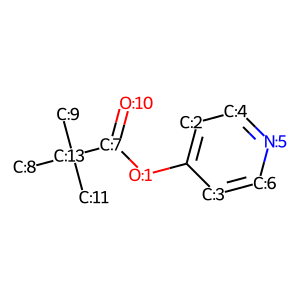

In [27]:
# vary smi_num from 0 to len(mol_to_reindex)
smi_num = 0
print(mol_to_reindex[smi_num][1])
mol = Chem.MolFromSmiles(mol_to_reindex[smi_num][1])
#Draw.MolToImage(mol)

In [18]:
new_smi = 'c1([O:1][C:7](=[O:6])[C:11]([CH3:8])([CH3:9])[CH3:10])[cH:2][c:4]([CH3:18])[n:5][c:6]2[c:3]1[cH:12][cH:13][cH:14][cH:15]2'

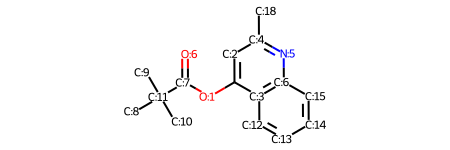

In [19]:
Chem.MolFromSmiles(new_smi)

In [20]:
# if the numerotation above is good update smi_to_renum
mol_to_reindex[smi_num][1] = new_smi

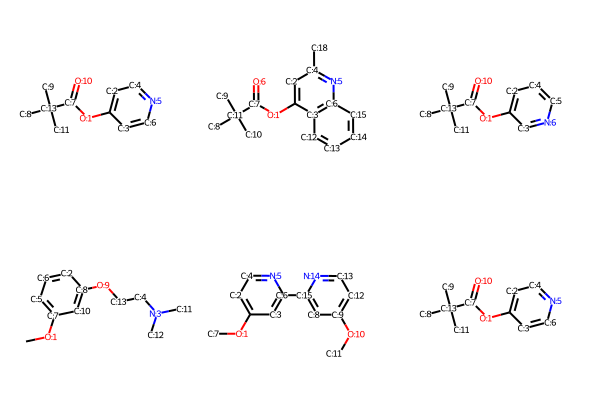

In [30]:
# final check
Draw.MolsToGridImage([Chem.MolFromSmiles(mol_to_reindex[i][1]) for i in range(len(mol_to_reindex))])

In [17]:
# if needed the publication can be check with the function below
df = pd.read_csv('../data/Data_test11262021.csv'', sep=',')
nb.show_DOIS(mol, df)

['https://doi.org/10.1021/acs.orglett.6b02656']

In [31]:
id_to_change = [mol_to_reindex[i][0] for i in range(len(mol_to_reindex))]
for i in range(len(List_numbered_7)):
    if List_numbered_7[i][0] in id_to_change:
        List_numbered_7[i][1] = mol_to_reindex[id_to_change.index(i)][1]
        
unik_CO_df3["C0C7_num"] = [List_numbered_7[i][1] for i in range(len(List_numbered_7))]

In [32]:
# export data to new .csv
#unik_CO_df3.to_csv("fragmentation_files/fragments_0-7.csv", sep=',',index=False)

# Add new molecules to the numerotation

In [63]:
smi = "COc1ccc2ccc(OC(=O)C(C)(C)C)cc2c1-c1cccc(OC(=O)C(C)(C)C)c1"
react = Chem.CanonSmiles(smi)
fragC = Chem.CanonSmiles("*c1cc(cccc2)c2cc1")
fragO = Chem.CanonSmiles("C(C)(C)C(=O)O*")
product = 'nan'
C0O1_num = 'nan'
C0C6_num = 'nan'
mol = Chem.MolFromSmiles(react)

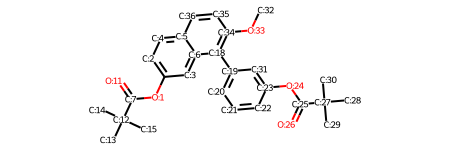

In [64]:
mol = nb.number_C0O1(mol, fragO, fragC)[0]
mol = nb.number_C2C3(mol)
mol = nb.number_C456(mol)
mol = nb.number_7(mol)
mol

c1([O:1][C:7](=[O:11])[C:12]([CH3:13])([CH3:14])[CH3:15])[cH:2][cH:4][c:5]2[c:6]([cH:3]1)[c:18](-[c:19]1[cH:20][cH:21][cH:22][c:23]([O:24][C:25](=[O:26])[C:27]([CH3:28])([CH3:29])[CH3:30])[cH:31]1)[c:34]([O:33][CH3:32])[cH:35][cH:36]2


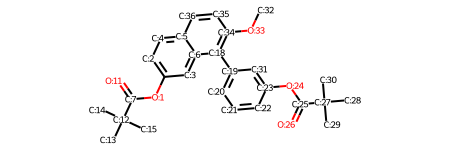

In [66]:
C0C7_num = Chem.MolToSmiles(mol)
print(C0C7_num)
C0C7_num = "c1([O:1][C:7](=[O:11])[C:12]([CH3:13])([CH3:14])[CH3:15])[cH:2][cH:4][c:5]2[c:6]([cH:3]1)[c:18](-[c:19]1[cH:20][cH:21][cH:22][c:23]([O:24][C:25](=[O:26])[C:27]([CH3:28])([CH3:29])[CH3:30])[cH:31]1)[c:34]([O:33][CH3:32])[cH:35][cH:36]2"
Chem.MolFromSmiles(C0C7_num)

In [67]:
df = pd.read_csv("fragmentation_files/fragments_0-7.csv", sep=',')
values = [react, fragC, fragO, 'nan', 'nan', 'nan', C0C7_num]
if react not in df["react"].to_list():
    new = dict()
    for i, col in enumerate(df.columns):
        new.update({col: values[i]})
    df.loc[len(df)] = pd.Series(new)
    df.to_csv("fragmentation_files/fragments_0-7.csv", sep=',', index=False)

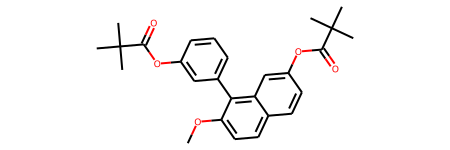

In [58]:
Chem.MolFromSmiles("COc1ccc2ccc(OC(=O)C(C)(C)C)cc2c1-c1cccc(OC(=O)C(C)(C)C)c1")

In [56]:
for smi in df_all["Reactant Smile (C-O)"]:
    if Chem.CanonSmiles(smi) == "COc1ccc2ccc(OC(=O)C(C)(C)C)cc2c1-c1cccc(OC(=O)C(C)(C)C)c1":
        print(smi)

COc2ccc1ccc(OC(=O)C(C)(C)C)cc1c2c3cccc(OC(=O)C(C)(C)C)c3


TypeError: No registered converter was able to produce a C++ rvalue of type std::__1::basic_string<wchar_t, std::__1::char_traits<wchar_t>, std::__1::allocator<wchar_t> > from this Python object of type float

In [22]:
df_all = pd.read_csv("../data/Data_test11262021.csv")

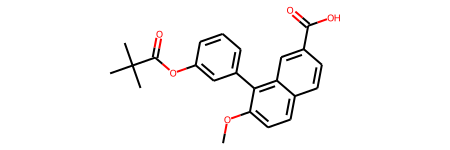

In [57]:
Chem.MolFromSmiles("COc2ccc1ccc(C(=O)O)cc1c2c3cccc(OC(=O)C(C)(C)C)c3")

In [224]:
df[df["react"] == Chem.CanonSmiles("COc1nc(Oc2ccccc2)nc(n1)OC")]["C0C7_num"].to_list()[0]

'c1([O:1][c:7]2[n:8][c:11]([O:10][CH3:9])[n:12][c:13]([O:17][CH3:14])[n:16]2)[cH:2][cH:4][cH:5][cH:6][cH:3]1'

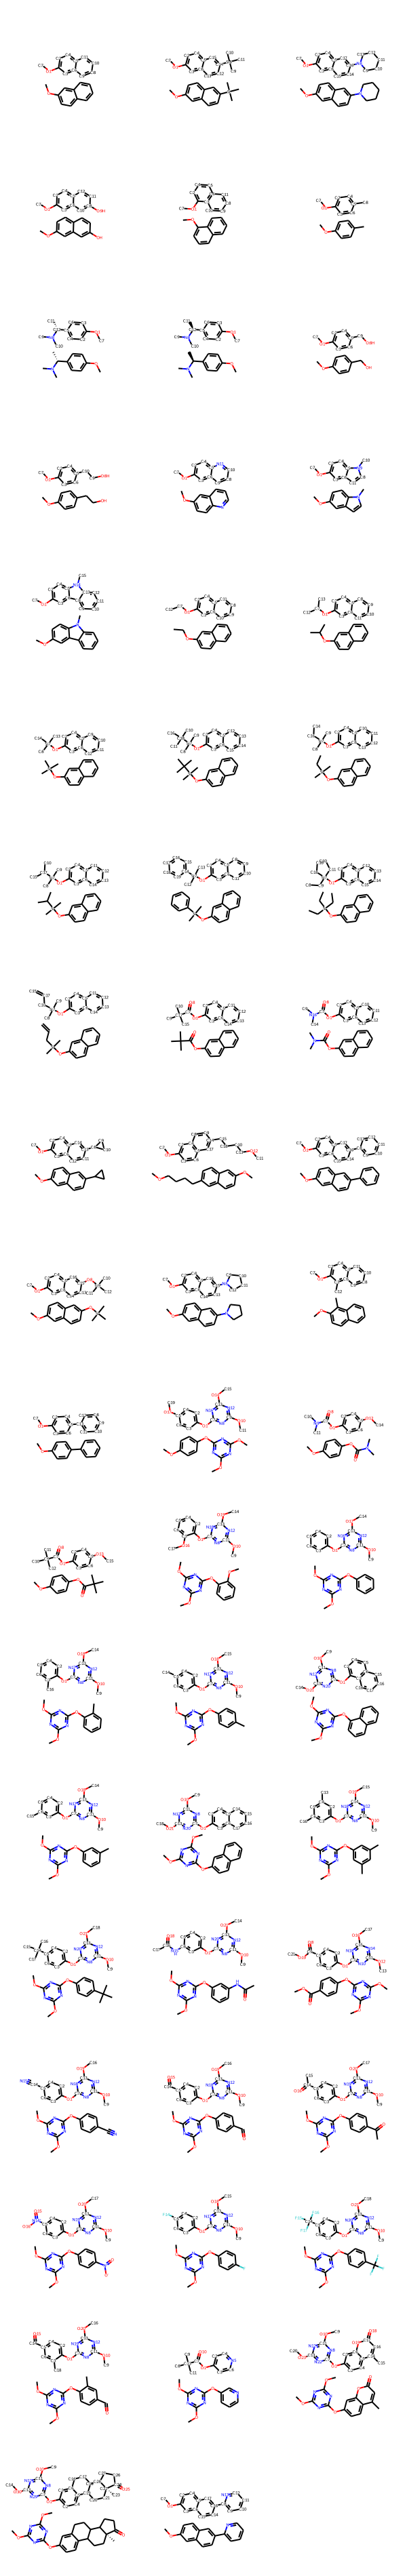

In [220]:
mols = []
for row in df.head(56).iterrows():
    smi = str(row[1]["react"] + '.' + row[1]["C0C7_num"])
    mols.append(Chem.MolFromSmiles(smi))
    
Chem.Draw.MolsToGridImage(mols, maxMols = 200)